# Imports

In [ ]:
# Standard library imports
import os
from pathlib import Path

# Third-party imports
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

# Constants

In [ ]:
config_yaml_path = os.path.join(
    '/content',
    'drive',
    'MyDrive',
    'Colab',
    'Machine Learning',
    'Regression',
    'Radancy',
    'config.yaml'
)

# Load config
with open(config_yaml_path, "r") as file:
  config = yaml.safe_load(file)

# Cross-platform path assembly
PATH = Path().joinpath(*config["PATH_PARTS"])

# Load Data

In [ ]:
df_train = joblib.load(PATH / 'df_train_eda.pkl')
df_test = joblib.load(PATH / 'df_test_eda.pkl')

In [ ]:
df = pd.concat([df_train, df_test])

# EDA

## CPA by Publisher (Top 10)

/tmp/ipython-input-3712037745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


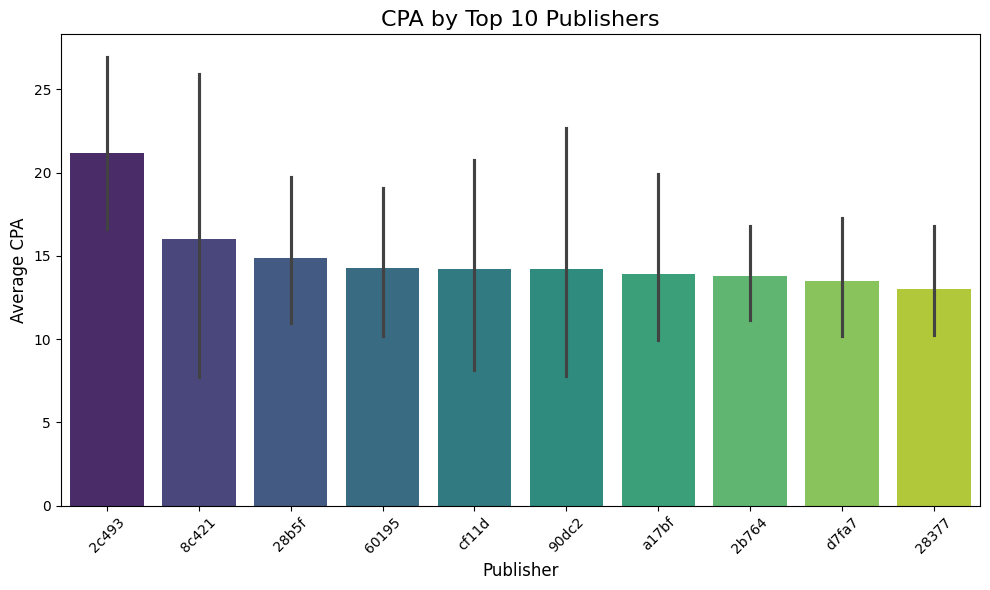

ANOVA F-statistic: 1.5092222305442824
ANOVA p-value: 0.140451272004969
Fail to reject H0: No significant difference in CPA between publishers.


In [ ]:
# Step 1: Find top 10 publishers by average CPA
top_publishers = (
    df.groupby("publisher")["cpa"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df[df["publisher"].isin(top_publishers)]

# Step 2: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top,
    x="publisher",
    y="cpa",
    order=(
        df_top
        .groupby("publisher")["cpa"]
        .mean()
        .sort_values(ascending=False)
        .index
    ),
    palette="viridis"
)
plt.title("CPA by Top 10 Publishers", fontsize=16)
plt.xlabel("Publisher", fontsize=12)
plt.ylabel("Average CPA", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Hypothesis Testing - ANOVA
# Null hypothesis (H0): Mean CPA is the same across all top 10 publishers
# Alternative hypothesis (H1): At least one publisher has a different mean CPA
groups = [df_top[df_top["publisher"] == pub]["cpa"] for pub in top_publishers]
anova_result = f_oneway(*groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
  print("Reject H0: Significant difference in CPA between publishers.")
else:
  print(
      "Fail to reject H0: No significant difference in CPA between publishers."
  )

## CPA by Industry

/tmp/ipython-input-3793332698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


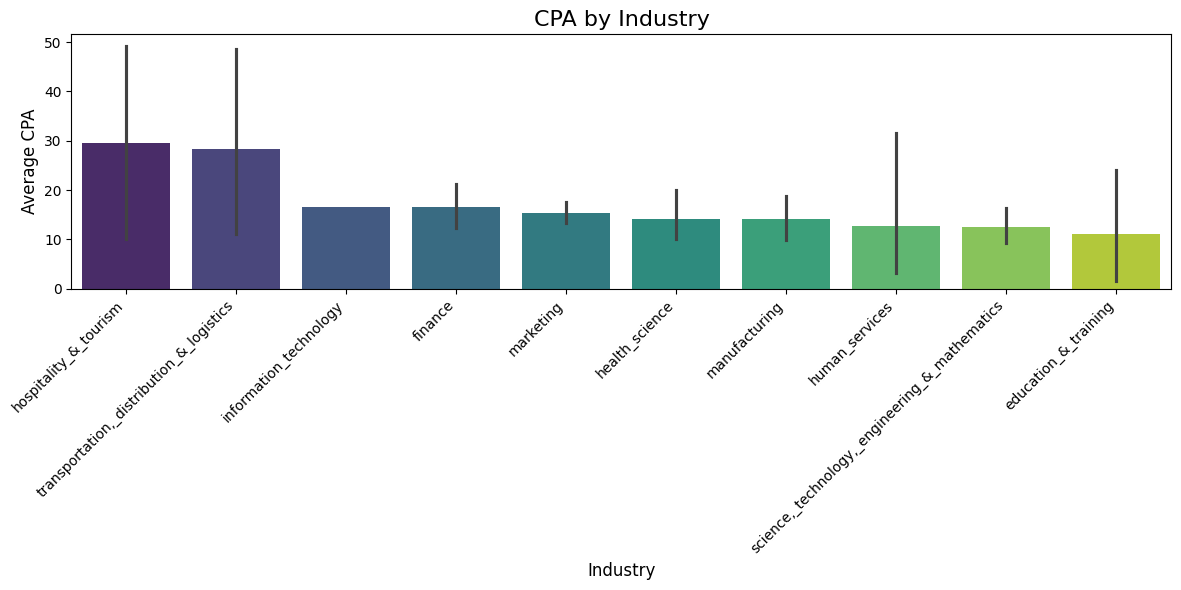

ANOVA F-statistic: 0.5120045355652989
ANOVA p-value: 0.8664941707873645
Fail to reject H0: No significant difference in CPA between industries.


In [ ]:
# Step 1: Bar plot - CPA by Industry
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="industry",
    y="cpa",
    order=(
        df
        .groupby("industry")["cpa"]
        .mean()
        .sort_values(ascending=False)
        .index
    ),
    palette="viridis"
)
plt.title("CPA by Industry", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average CPA", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 2: Hypothesis Testing - ANOVA
# Null hypothesis (H0): Mean CPA is the same across all industries
# Alternative hypothesis (H1): At least one industry has a different mean CPA
industries = df["industry"].unique()
groups = [df[df["industry"] == ind]["cpa"] for ind in industries]

anova_result = f_oneway(*groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
  print("Reject H0: Significant difference in CPA between industries.")
else:
  print(
      "Fail to reject H0: No significant difference in CPA between industries."
  )

## Customer Segmentation by CPA

/tmp/ipython-input-576802233.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


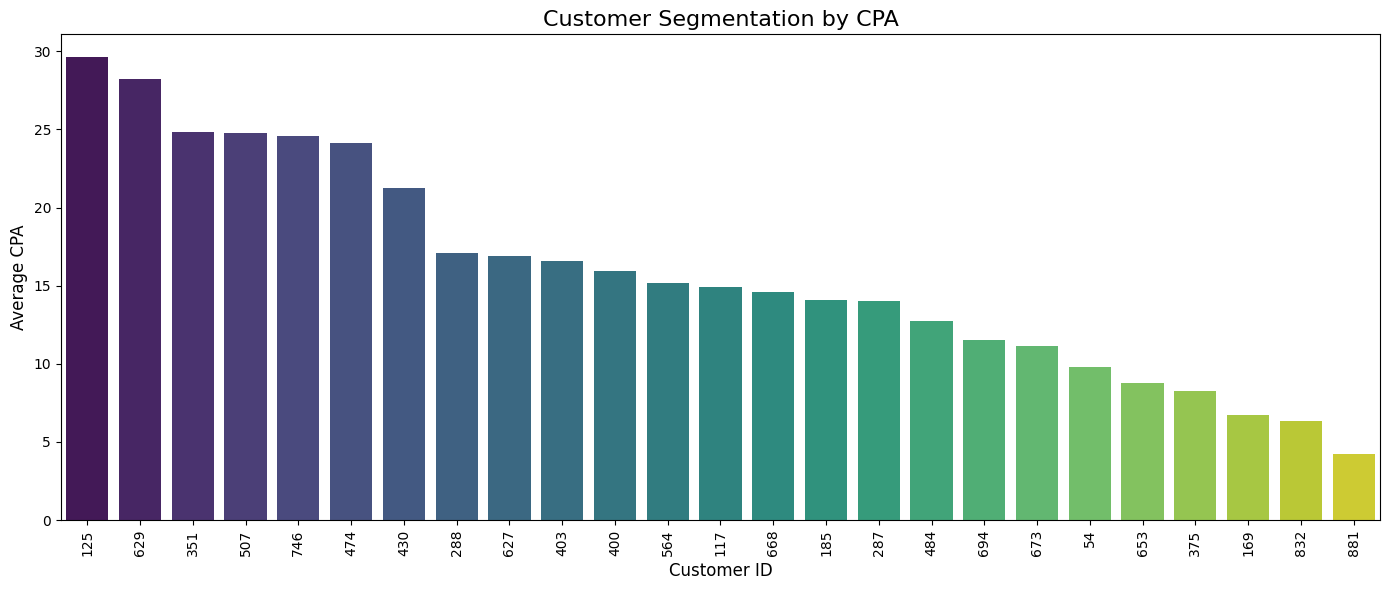

ANOVA F-statistic: 0.8001103248350908
ANOVA p-value: 0.7392453726762704
Fail to reject H0: No significant difference in CPA between customers.


In [ ]:
# Step 1: Calculate average CPA per customer
customer_avg_cpa = df.groupby("customer_id")["cpa"].mean().reset_index()

# Step 2: Bar plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=customer_avg_cpa,
    x="customer_id",
    y="cpa",
    order=customer_avg_cpa.sort_values("cpa", ascending=False)["customer_id"],
    palette="viridis"
)
plt.title("Customer Segmentation by CPA", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Average CPA", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 3: ANOVA - Check if CPA differs significantly between customers
customers = df["customer_id"].unique()
groups = [df[df["customer_id"] == cust]["cpa"] for cust in customers]

anova_result = f_oneway(*groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
  print("Reject H0: Significant difference in CPA between customers.")
else:
  print(
      "Fail to reject H0: No significant difference in CPA between customers."
  )

## CPA by Category (Ascending)

/tmp/ipython-input-266023273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


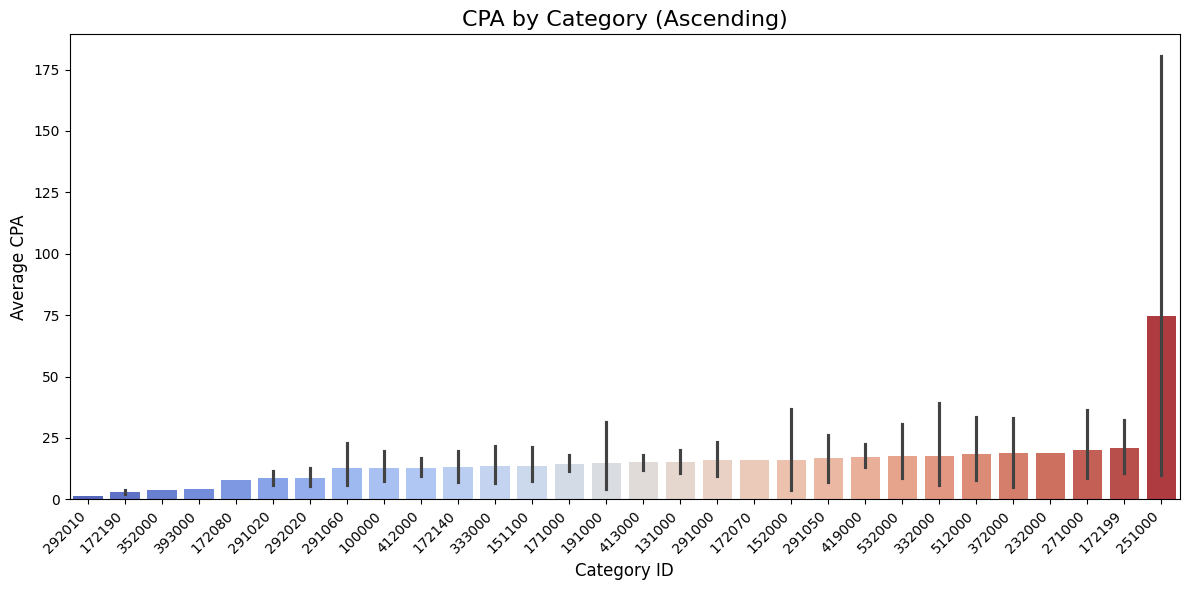

ANOVA F-statistic: 1.609951484673503
ANOVA p-value: 0.022871665299812563
Reject H0: Significant difference in CPA between categories.


In [ ]:
# Step 1: Bar plot - CPA by Category (ascending order)
plt.figure(figsize=(12, 6))
order = (
    df
    .groupby("category_id")["cpa"]
    .mean()
    .sort_values(ascending=True)
    .index
)

sns.barplot(
    data=df,
    x="category_id",
    y="cpa",
    order=order,
    palette="coolwarm"
)
plt.title("CPA by Category (Ascending)", fontsize=16)
plt.xlabel("Category ID", fontsize=12)
plt.ylabel("Average CPA", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 2: ANOVA test - check if CPA differs across categories
categories = df["category_id"].unique()
groups = [df[df["category_id"] == cat]["cpa"] for cat in categories]

anova_result = f_oneway(*groups)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
  print("Reject H0: Significant difference in CPA between categories.")
else:
  print(
      "Fail to reject H0: No significant difference in CPA between categories."
  )

## Day of Week Performance

/tmp/ipython-input-2593733576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


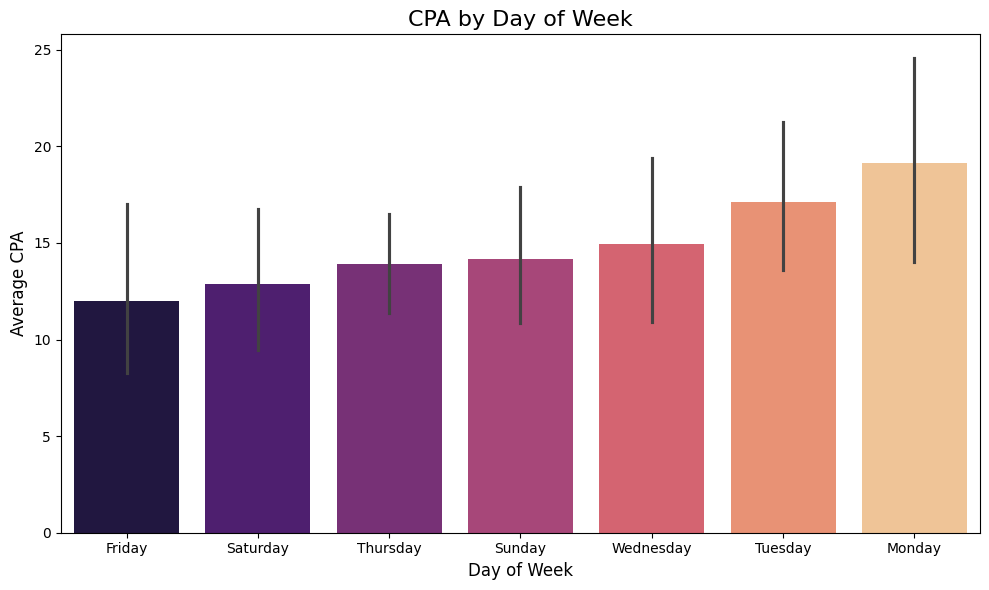

ANOVA F-statistic: 1.3721221324928965
ANOVA p-value: 0.22306649415112234
Fail to reject H0: No significant difference in CPA between days.


In [ ]:
# Step 1: Bar plot - CPA by Day of Week
plt.figure(figsize=(10, 6))
order = df.groupby("day_of_week")["cpa"].mean().sort_values().index

sns.barplot(
    data=df,
    x="day_of_week",
    y="cpa",
    order=order,
    palette="magma"
)
plt.title("CPA by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average CPA", fontsize=12)
plt.tight_layout()
plt.show()

# Step 2: ANOVA test
days = df["day_of_week"].unique()
groups = [df[df["day_of_week"] == day]["cpa"] for day in days]

anova_result = f_oneway(*groups)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
  print("Reject H0: Significant difference in CPA between days.")
else:
  print("Fail to reject H0: No significant difference in CPA between days.")

## Month Performance

/tmp/ipython-input-4207958345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


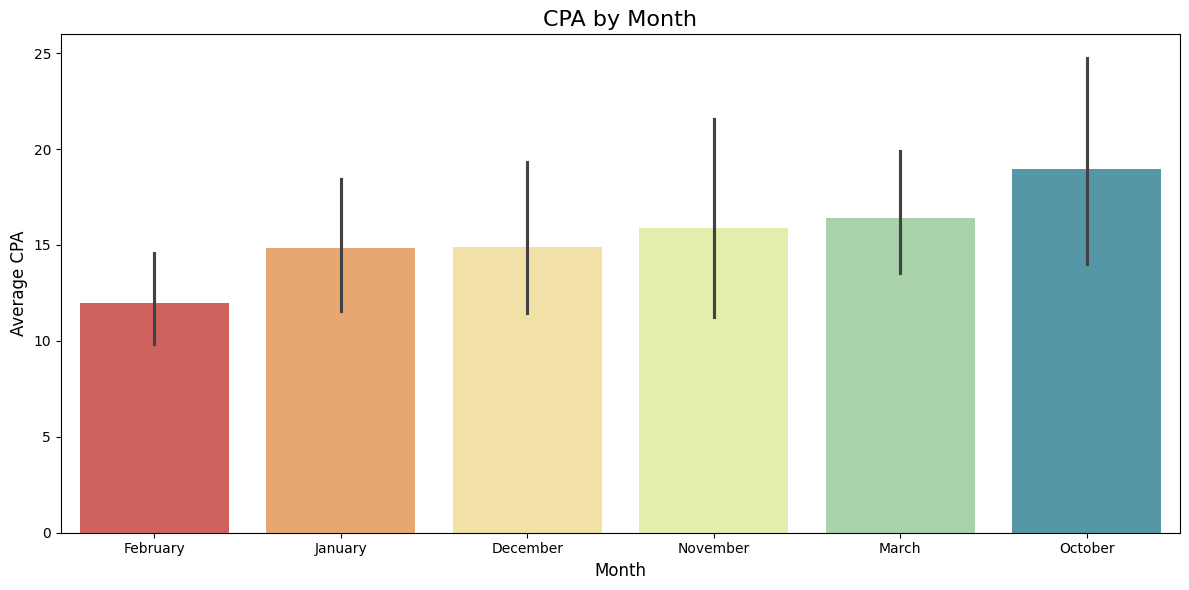

ANOVA F-statistic: 1.083038019057455
ANOVA p-value: 0.3682595733269245
Fail to reject H0: No significant difference in CPA between months.


In [ ]:
# Step 1: Bar plot - CPA by Month
plt.figure(figsize=(12, 6))

# ascending order
order = df.groupby("month")["cpa"].mean().sort_values().index

sns.barplot(
    data=df,
    x="month",
    y="cpa",
    order=order,
    palette="Spectral"
)
plt.title("CPA by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average CPA", fontsize=12)
plt.tight_layout()
plt.show()

# Step 2: ANOVA test
months = df["month"].unique()
groups = [df[df["month"] == month]["cpa"] for month in months]

anova_result = f_oneway(*groups)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
  print("Reject H0: Significant difference in CPA between months.")
else:
  print("Fail to reject H0: No significant difference in CPA between months.")

## Cost Per Click (Ascending)

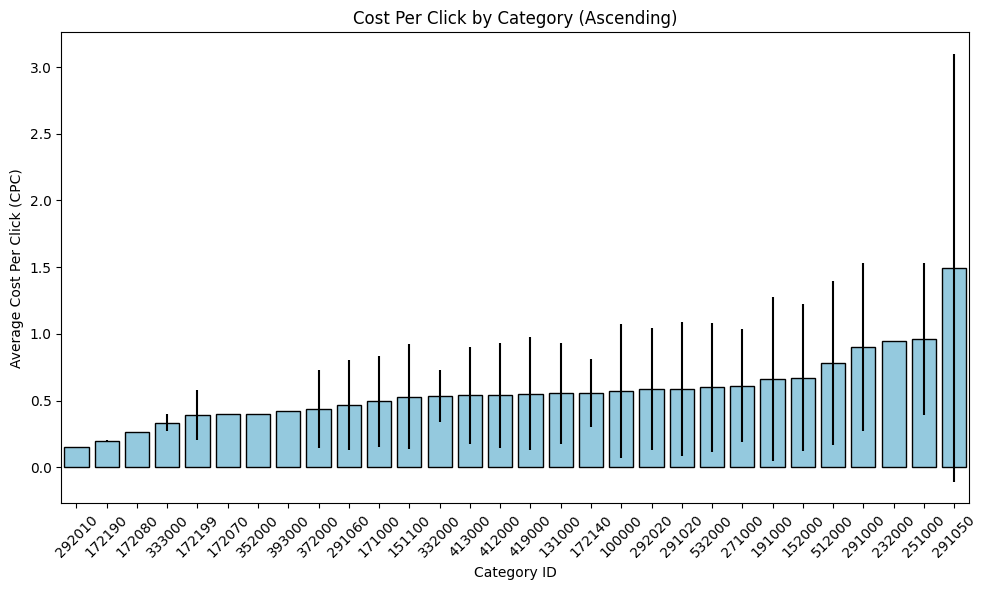

ANOVA results: F-statistic = 1.3918, p-value = 0.0836
Fail to reject H0: No statistically significant difference in CPC across categories.


In [ ]:
# Calculate CPC safely
df['cpc'] = (
    df
    .apply(
        lambda row: row['cost'] / row['clicks']
        if row['clicks'] > 0
        else 0, axis=1
    )
)

# Aggregate: mean and std per category
agg_df = df.groupby('category_id')['cpc'].agg(['mean', 'std']).reset_index()
agg_df = agg_df.sort_values('mean', ascending=True)

# Plot aggregated means with error bars (std)
plt.figure(figsize=(10,6))
sns.barplot(
    data=agg_df,
    x='category_id',
    y='mean',
    yerr=agg_df['std'],       # pass std dev as error bars
    color='skyblue',
    edgecolor='black'
)
plt.xticks(rotation=45)
plt.title('Cost Per Click by Category (Ascending)')
plt.xlabel('Category ID')
plt.ylabel('Average Cost Per Click (CPC)')
plt.tight_layout()
plt.show()

# Hypothesis testing on original data groups
groups = [group['cpc'].values for _, group in df.groupby('category_id')]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_val:.4f}")

if p_val < 0.05:
  print(
      "Reject H0: Statistically significant differences in CPC across "
      "categories."
  )
else:
  print(
      "Fail to reject H0: No statistically significant difference in CPC "
      "across categories."
  )